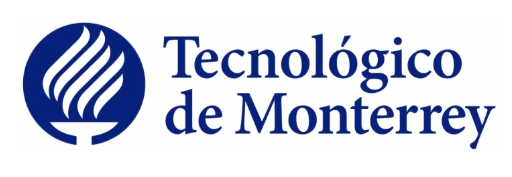

                            Campus Santa Fe                              

            Reporte: Logistic Regression Breast Cancer Dataset           

    Inteligencia artificial avanzada para la ciencia de datos I (Gpo 101)

                    Andrés Jaramillo Barón A01029079                     

                        Esteban Castillo Juarez                          

                                03/09/2025                               

### Introducción

In [12]:
import codecs
import operator
import math
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [2]:
vocabulary={}

with codecs.open("training.txt", "r", "UTF-8") as file:
    for line in file:
        elements=line.split("@@@")
        for token in elements[0].split(" "):
            if token in vocabulary:
                vocabulary[token]+=1
            else:
                vocabulary[token]=1

if "" in vocabulary:
    del vocabulary[""]

sortedVocabulary = sorted(vocabulary.items(), key=operator.itemgetter(1), reverse=True)

print("Top vocabulary tokens/words")
print(sortedVocabulary[:6])

print("Save vocabulary into a file")
with codecs.open("vocabulary.txt", "w", "UTF-8") as file:
    for token in sortedVocabulary[:]:
        file.write(token[0]+","+str(token[1])+"\n")

Top vocabulary tokens/words
[('the', 3509), ('to', 1978), ('in', 1304), ('on', 1217), ('a', 1152), ('and', 1150)]
Save vocabulary into a file


In [3]:
featureNumber = 100
count = 0
features = []

with codecs.open("vocabulary.txt", "r", "UTF-8") as file:
    for line in file:
        elements=line.split(",")
        if (count==featureNumber):
            break
        features.append(elements[0].replace('\n', ''))
        count+=1

print("Top 10 features for the classification algorithm:")
print(features[:10])

Top 10 features for the classification algorithm:
['the', 'to', 'in', 'on', 'a', 'and', 'i', 'of', 'for', 'is']


In [5]:
trainingVectors=[]
trainingLabels=[]
testVectors=[]
testLabels=[]

print("Create training vectors")
with codecs.open("training.txt", "r", "UTF-8") as file:
    for line in file:
        temporalVector=[]
        elements=line.split("@@@")
        currentTokens=elements[0].split(" ")
        for feature in features:
            if feature in currentTokens:
                temporalVector.append(1)
            else:
                temporalVector.append(0)
        trainingVectors.append(temporalVector)
        trainingLabels.append(elements[1].replace('\n', ''))

with codecs.open("trainingVectors.txt", "w", "UTF-8") as file:
    for vector,label in zip(trainingVectors,trainingLabels):
        file.write(",".join([str(x) for x in vector])+","+label+"\n")

print("Create test vectors")
with codecs.open("test.txt", "r", "UTF-8") as file:
    for line in file:
        temporalVector=[]
        elements=line.split("@@@")
        currentTokens=elements[0].split(" ")
        for feature in features:
            if feature in currentTokens:
                temporalVector.append(1)
            else:
                temporalVector.append(0)
        testVectors.append(temporalVector)
        testLabels.append(elements[1].replace('\n', ''))

print("Save test vectors into a file")
with codecs.open("testVectors.txt", "w", "UTF-8") as file:
    for vector,label in zip(testVectors,testLabels):
        file.write(",".join([str(x) for x in vector])+","+label+"\n")

Create training vectors
Create test vectors
Save test vectors into a file


In [7]:
def naiveBayesTraining(trainingVectors, trainingLabels):
    numberTrainingDocuments=len(trainingVectors)

    NumberFeatures=len(trainingVectors[0])
    numberPositive=len([x for x in trainingLabels if x == "positive"])
    numberNegative=len([x for x in trainingLabels if x == "negative"])

    pProbability=numberPositive/float(numberTrainingDocuments)
    nProbability=numberNegative/float(numberTrainingDocuments)

    pNumeratorProbability=[1]*NumberFeatures
    nNumeratorProbability=[1]*NumberFeatures

    pDenominatorProbability=2
    nDenominatorProbability=2

    for x in range(numberTrainingDocuments):
        if trainingLabels[x] == "positive":
            counter = 0
            for y in trainingVectors[x]:
                pNumeratorProbability[counter]+=y
                counter+=1
            pDenominatorProbability+=sum(trainingVectors[x])
        else:
            counter=0
            for y in trainingVectors[x]:
                nNumeratorProbability[counter]+=y
                counter+=1
            nDenominatorProbability+=sum(trainingVectors[x])

    pWordProbability = []

    for x in pNumeratorProbability:
        pWordProbability.append(math.log(x/float(pDenominatorProbability)))

    nWordProbability=[]

    for x in nNumeratorProbability:
        nWordProbability.append(math.log(x/float(nDenominatorProbability)))
    
    return (pWordProbability,nWordProbability,pProbability,nProbability)

result = naiveBayesTraining(trainingVectors, trainingLabels)

In [8]:
def classifyNB(testVector, pWordProbability, nWordProbability, pProbability, nProbability):
    counter=0
    probabilities=[]
    for x in testVector:
        probabilities.append(testVector[counter]*nWordProbability[counter])
        counter+=1
    p0=sum(probabilities)+math.log(nProbability)

    counter=0
    probabilities=[]

    for x in testVector:
        probabilities.append(testVector[counter]*pWordProbability[counter])
        counter+=1
    p1=sum(probabilities)+math.log(pProbability)

    if p1 > p0:
        return "positive"
    else:
        return "negative"

In [9]:
trainingVectors=[]
trainingLabels=[]
testVectors=[]
testLabels=[]

print("Load training vectors")
with codecs.open("trainingVectors.txt", "r", "UTF-8") as file:
    for line in file:
        line=line.replace('\n', '')
        line=line.split(",")
        trainingLabels.append(line[-1])
        trainingVectors.append([int(x) for x in line[:-1]])

print("Load test vectors")
with codecs.open("testVectors.txt", "r", "UTF-8") as file:
    for line in file:
        line=line.replace('\n', '')
        line=line.split(",")
        testLabels.append(line[-1])
        testVectors.append([int(x) for x in line[:-1]])

print("Train the Naive Bayes algorithm over training vectors")
model=naiveBayesTraining(trainingVectors,trainingLabels)

print("Use the obtained model over test vectors for clasifying")
correctPredictions=0
TotalPredictions=0

for vector,label in zip(testVectors,testLabels):
    TotalPredictions+=1
    predictedLabel=classifyNB(vector,model[0],model[1],model[2],model[3])
    if predictedLabel==label:
        correctPredictions+=1

print("Model accuracy: ", correctPredictions/TotalPredictions, "%")

Load training vectors
Load test vectors
Train the Naive Bayes algorithm over training vectors
Use the obtained model over test vectors for clasifying
Model accuracy:  0.4359861591695502 %


In [11]:
naive_bayes = MultinomialNB()

print("Train the Naive Bayes algorithm over training vectors")
naive_bayes.fit(trainingVectors, trainingLabels)

print("Apply Naive Bayes approach over test samples on scikit-learn")
predictions = naive_bayes.predict(testVectors)

accuracy = accuracy_score(testLabels, predictions)
print("Model accuracy:", accuracy)

Train the Naive Bayes algorithm over training vectors
Apply Naive Bayes approach over test samples on scikit-learn
Model accuracy: 0.45674740484429066


In [14]:
samples=[]
sampleLabels=[]

print("Load training vectors")
with codecs.open("trainingVectors.txt", "r", "UTF-8") as file:
    for line in file:
        line=line.replace('\n', '')
        line=line.split(",")
        sampleLabels.append(line[-1])
        samples.append([int(x) for x in line[:-1]])

print("Load test vectors")
with codecs.open("testVectors.txt", "r", "UTF-8") as file:
    for line in file:
        line=line.replace('\n', '')
        line=line.split(",")
        sampleLabels.append(line[-1])
        samples.append([int(x) for x in line[:-1]])

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, samples, sampleLabels, cv=kfold)

model = MultinomialNB()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(model, samples, sampleLabels, cv=kfold, scoring=scoring, return_train_score=False)

print("Accuracy for each fold:", results['test_accuracy'])
print("Precision for each fold:", results['test_precision_macro'])
print("Recall for each fold:", results['test_recall_macro'])
print("F1 Score for each fold:", results['test_f1_macro'])

Load training vectors
Load test vectors


InvalidParameterError: The 'estimator' parameter of cross_val_score must be an object implementing 'fit'. Got ([-2.5358086740440333, -3.0078522282285483, -3.3760957478286024, -3.4139009371703177, -3.5093862636604394, -3.447742100549233, -3.60643205280991, -3.608557452122224, -3.4903017149680284, -3.71391796778005, -3.7574030797197886, -3.702166951244531, -3.8668873125614773, -3.9206484894529297, -3.9591717714492654, -3.965232396060956, -4.185341043680012, -4.473023116131793, -4.24383725036162, -4.390652118698665, -4.414182616108859, -4.686116331592501, -4.530181529971741, -4.625491709776067, -4.3407551475540425, -4.602234847611799, -4.737409625980051, -4.791476847250327, -4.819647724217024, -4.540934321748003, -4.585140414252499, -4.643296334409572, -4.957269102093071, -4.7308522254338925, -5.126561158596692, -4.870941018604574, -4.848635261090276, -4.909259882906711, -4.848635261090276, -4.973798404044282, -4.965499601229587, -4.805463089225067, -4.488290588262581, -4.92500823987485, -5.156119960838237, -5.126561158596692, -5.007699955719963, -4.990605522360664, -5.541782441650222, -4.973798404044282, -5.3069428505728204, -5.136317333542057, -5.498610269785012, -5.318638890336011, -5.391842294359306, -5.354570899562075, -5.116899247684955, -5.404581320136736, -4.805463089225067, -5.379263512152447, -5.417484724972644, -5.060809781033912, -5.318638890336011, -5.283953332348122, -5.4846240278102725, -5.4572250536221585, -5.753956961593857, -5.683752702920608, -5.541782441650222, -5.196941955358492, -5.4846240278102725, -5.772306100262053, -5.379263512152447, -5.618155420434795, -5.7182388789917775, -5.079158919702108, -5.556597527435362, -5.890089135918437, -5.016358018463078, -5.512794904776969, -5.088461312364422, -5.571635404799903, -5.700847136279909, -5.586902876930691, -5.700847136279909, -5.911142545116269, -5.977100512908066, -5.430556806539997, -5.932648750337233, -5.810046428244901, -5.683752702920608, -5.772306100262053, -5.753956961593857, -5.753956961593857, -6.000090031132766, -5.932648750337233, -5.618155420434795, -5.4572250536221585, -5.911142545116269, -5.283953332348122], [-2.482052985070876, -2.9906570028134407, -3.281580569189393, -3.338848123547867, -3.4249668824294925, -3.4620485573340245, -3.470977188078326, -3.5168567938290196, -3.6686628066970237, -3.7019992269646154, -3.8742026535929854, -3.891123531081323, -3.8742026535929854, -3.969177319218689, -4.1032359989632585, -4.150761140826104, -4.423801663284937, -4.263028442697185, -4.673456340147479, -4.412240840883861, -4.453302327681635, -4.177668593746028, -4.361809987256969, -4.367289453021595, -4.751014574493353, -4.554016303283466, -4.567349834152931, -4.651315214270265, -4.587689518390054, -4.946323326814119, -4.936567151868754, -4.898467305636483, -4.554016303283466, -4.852797268803295, -4.629653717489085, -4.800611515632725, -4.835097691703894, -4.82636401173514, -5.116948843844883, -4.783804397316344, -4.8708157743059735, -5.06043663358154, -6.204000310111916, -4.996585161595007, -4.82636401173514, -4.8177059489920255, -4.986328661427818, -4.95617562325713, -4.601482840522389, -5.093959325620183, -4.719265876178773, -5.06043663358154, -4.936567151868754, -4.9269052409570175, -4.9761762899638, -5.071486469768125, -5.366603520707424, -5.105388021443806, -6.738082796042174, -5.308616263057075, -5.240562799812059, -5.810096024404827, -5.4124130567387185, -5.49375869619267, -5.240562799812059, -5.240562799812059, -5.25380802656208, -5.176846985425951, -5.444161755053298, -5.933709980372004, -5.563962954865919, -5.280836698949999, -5.659273134670244, -5.4124130567387185, -5.366603520707424, -6.575563866544399, -5.52824487226384, -5.322800898049031, -7.9618582276642895, -5.659273134670244, -7.374071562762171, -5.6010042265462685, -5.52824487226384, -5.659273134670244, -5.5823120935341155, -5.4281614137068575, -5.366603520707424, -6.015948078608976, -5.460422275925079, -5.563962954865919, -5.742654743609295, -5.700095129190499, -5.639470507374064, -5.679475841987763, -5.54594444936324, -5.563962954865919, -5.98777720164228, -6.352420315230189, -5.700095129190499, -7.173400867300019], 0.5371387628373537, 0.20515882493432053) instead.